In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt



# Сообщения, присланные в ЦАП.
# id, task, variant, group, time
messages = pd.read_csv('messages.csv', names=['id', 'task', 'variant', 'group', 'time'])

# Результаты проверок сообщений, присланных в ЦАП.
# id, message, time, status
checks = pd.read_csv('checks.csv', names=['id', 'message', 'time', 'status'])

# Состояния задач ЦАП.
# task, variant, group, time, status, achievements
statuses = pd.read_csv('statuses.csv', names=['task', 'variant', 'group', 'time', 'status', 'achievements'])

# Таблица соответствия номеров групп и их названий.
# id, title
groups = pd.read_csv('groups.csv', names=['id', 'title'])

# О статусах см. https://github.com/kispython-ru/dta/blob/main/webapp/models.py#L44-L50

3.1 Как по дням недели распределяется активность студентов?

<Axes: >

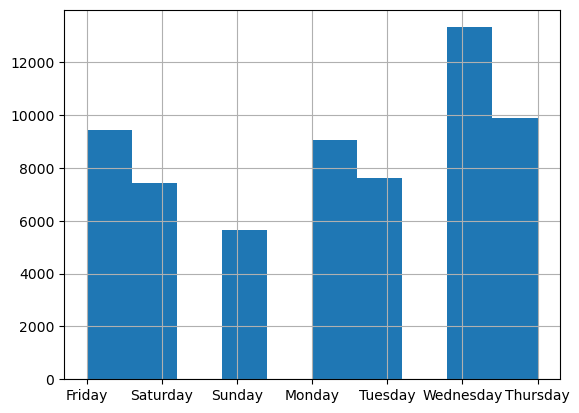

In [4]:
messages['time'] = pd.to_datetime(messages['time'])
messages['day_of_week'] = messages['time'].dt.day_name()
messages['day_of_week'].hist()


3.2. Как по времени суток распределяется активность студентов?

<Axes: >

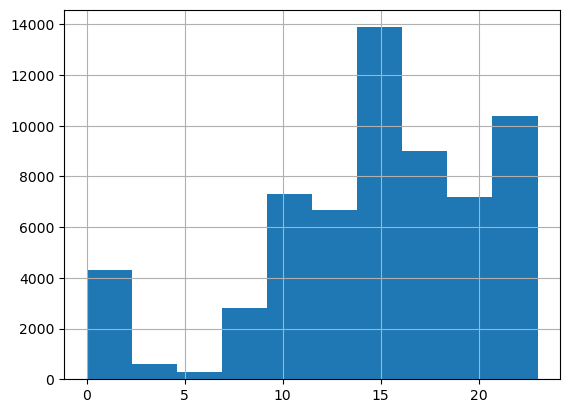

In [10]:
messages['time'] = pd.to_datetime(messages['time'])
messages['hour'] = messages['time'].dt.hour
messages['hour'].hist()

3.3. Сколько сообщений в среднем студенты отправляют по каждой задаче?

(array([20738., 11680.,  9996.,     0.,  7855.,  5760.,     0.,  2133.,
         3713.,   528.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

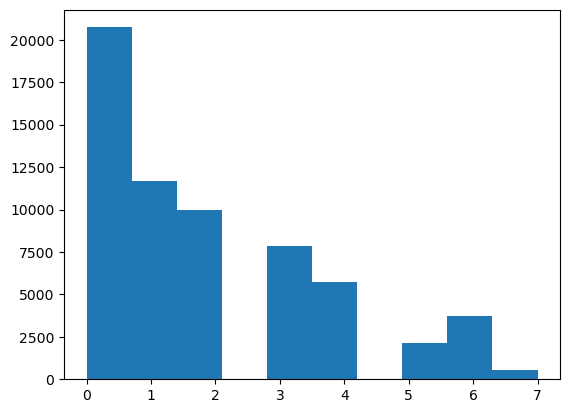

In [9]:
plt.hist(messages['task'])

3.4. Как за период с начала семестра менялась активность студентов по каждой из задач?

' checks[\'time\'] = pd.to_datetime(checks[\'time\']).dt.date\nfor i in range(8):\n  data = checks[checks[\'task\'] == 0][["time"]]\n  print(f\'Task{i}\')\n  plt.plot(data.groupby("time")["time"].count())\n  plt.show() '

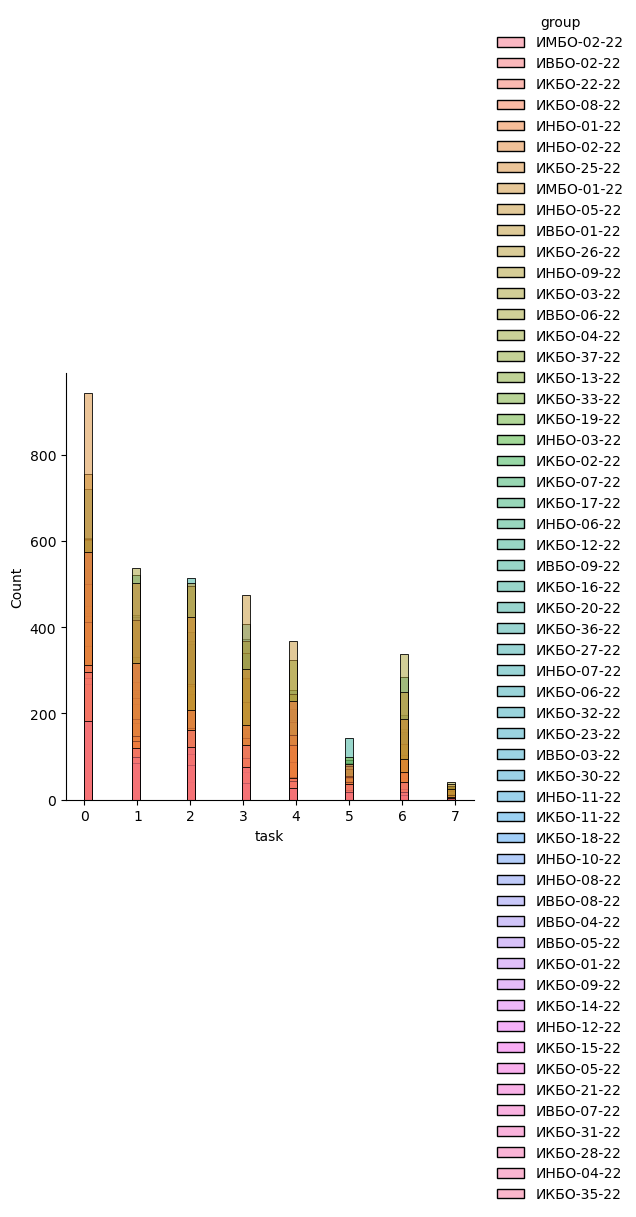

In [11]:
import seaborn as sns
df = messages.copy()
sns.displot(df, x="task", hue="group")

""" checks['time'] = pd.to_datetime(checks['time']).dt.date
for i in range(8):
  data = checks[checks['task'] == 0][["time"]]
  print(f'Task{i}')
  plt.plot(data.groupby("time")["time"].count())
  plt.show() """

3.5.В каких группах было отправлено больше всего сообщений?

<Axes: >

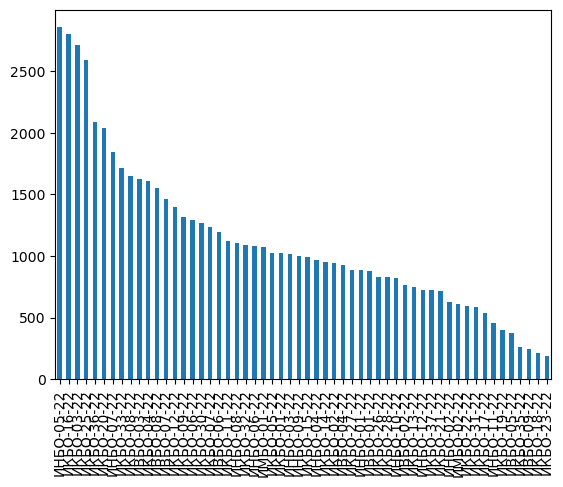

In [7]:
messages['group'] = messages['group'].map(groups.set_index('id')['title'])
messages.group.value_counts().plot(kind='bar')

3.6. В каких группах было получено больше всего правильных решений?

<Axes: >

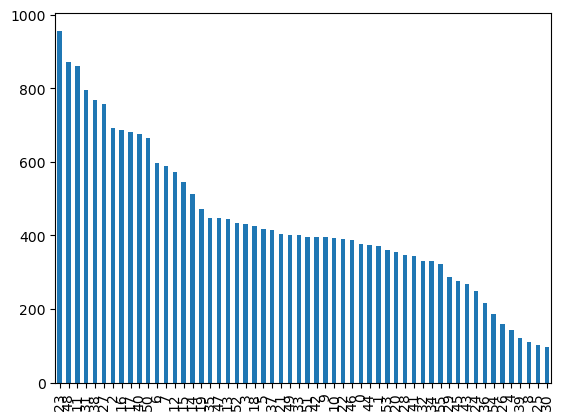

In [6]:
messages.loc[:, "status"] = None
messages['status'] = messages['id'].map(checks.set_index('id')['status'])
messages.loc[messages['status'] == 3].group.value_counts().plot(kind='bar')

3.7. (уровень сложности: средний)

Какие задачи оказались самыми легкими, самыми сложными?

3.8. (уровень сложности: средний)

Студенты каких групп заработали больше всего достижений?

In [ ]:
statuses['group'] = statuses['group'].map(groups.set_index('id')['title'])
statuses.group.value_counts().plot(kind='bar')